# Project: Wrangling and Analyze Data

## Data Gathering

In [108]:
import pandas as pd
import numpy as np
import requests
import os
import time
import datetime
import random

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows

60

The WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) was directly downloaded from the Udacity course material and saved on the local machine. After saving the file in the local machine it was loaded into the Jupyter Notebook environment.

In [109]:
# load the provided enhanced twitter archive file into a DataFrame
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [110]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


'image_predictions.tsv' is the file containing the tweet image predictions i.e. what breed of dog (or other object, animal, etc.) is present in each tweet. This file is also hosted on Udacity's servers and is downloaded programmatically using the Requests library

In [111]:
# download the image predictions file with the provided link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [112]:
#  HTTP status code 200 indicates the request has succeeded 
file_images = url.split('/')[-1]

with open(os.path.join('./', file_images), mode = 'wb') as file:
    file.write(response.content)

In [113]:
ls *.tsv

 Volume in drive C is PwC_OS
 Volume Serial Number is 4EE6-B77F

 Directory of C:\Users\asaha072\Downloads\Digital Accelerator\Data Analytics Track\Data Wrangling\Project - We Rate Dogs

11/06/2021  01:02 PM           335,079 image-predictions.tsv
               1 File(s)        335,079 bytes
               0 Dir(s)  309,544,218,624 bytes free


After confirming that the file has been saved on the local machine, it was loaded into the Jupyter Notebook environment.

In [114]:
# read image predictions file into a DataFrame
df_predictions = pd.read_csv(file_images, sep = '\\t', engine = 'python')
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [115]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The ocee presented below is from the "twitter_api.py" file provided in the course to gather some of the required data for the project

In [ ]:
#source: twitter_pi.py file provided in the udacity course material
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_predictions.tweet_id.values
print(len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id)
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### Read in JSON data to DataFrame ###
While I tried creating a Twitter developer account so as to extract the JSON data for each tweet, I was unable to do so. hence, I am using the "tweet-json.txt" file provided as part of the course material. The said file was downloaded manually from the udacity servers. After saving the file in the local machine it was loaded into the Jupyter Notebook environment.

In [116]:
import json
tweet_json_file = 'tweet-json.txt'
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_data_extra = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_data_extra.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [117]:
df_tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [118]:
df_tweet_data_extra.to_csv('tweet_data_extra.csv', index = False)

## Assessing Data
In this section I assess the data that was gathered, both visually and programmatically for quality and tidiness issues. One of the key points for the analysis requires that only tweets with original ratings with images, no retweets, be retained.

The quality of data is assessed against dimensions or criteria concerning the content: completeness, validity, accuracy and consistency.


In [119]:
# Load the data gathered data files
archive = pd.read_csv('twitter-archive-enhanced.csv')
predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
json_data = pd.read_csv('tweet_data_extra.csv')

In [120]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### NOTES: ####

The info() method reveals several quality and tidiness issues:

* There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
* There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)
* There are 2297 tweets with expanded_urls (links to images) indicating 59 tweets with missing data
* The timestamp field is in string format (object)
* There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
* The columns related to retweets are not applicable for original tweets
* The columns related to replies are not applicable for original tweets

In [121]:
print("Data type for timestamp:  " + str(type(archive.timestamp[0])))

Data type for timestamp:  <class 'str'>


In [122]:
print("Duplicated:  {}".format(sum(archive.duplicated())))

Duplicated:  0


In [123]:
archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [124]:
archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


The following issues are discovered:

1. The timestamp column has dates in string form.
2. Some of the rows from the tail() output above have invalid strings in the name column, e.g. "a", "an", "in". These words are all the 3rd word in the tweet
3. The columns with numerical data that are typically used for analysis are located to the far right of the table, and the columns with long strings are on the left; this makes it difficult to readily see the data that will be used for analyses.

In [125]:
archive.name.value_counts().head(50)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
Tucker      10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Buddy        7
an           7
Daisy        7
Bailey       7
Toby         7
Leo          6
Dave         6
Bella        6
Jack         6
Milo         6
Scout        6
Koda         6
Oscar        6
Stanley      6
Rusty        6
Jax          6
very         5
Gus          5
Chester      5
George       5
Alfie        5
Bentley      5
Sunny        5
Louis        5
Finn         5
Phil         5
Larry        5
Oakley       5
Sammy        5
Boomer       4
Maximus      4
one          4
Scooter      4
Winnie       4
Ruby         4
Maggie       4
Gary         4
Name: name, dtype: int64

### Notes :
It looks like the dog names are all capitalized, so words that begin in lowercase are probably not names, like "a", "the" and "an". Here's the list of these "names".

In [126]:
# list all names that are NOT capitalized
err_names = archive.name.str.contains('^[a-z]', regex = True)
archive[err_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [127]:
len(archive[err_names])

109

### Notes:
This list contains non-capitalized words from the name column for 109 tweets, none of which are a valid name.

In [128]:
# number of tweets with missing urls
sum(archive.expanded_urls.isna())

59

In [129]:
# how many tweets with missing urls are replies or retweets?
sum(archive.expanded_urls.isna() & \
    (archive.in_reply_to_status_id.notnull() | \
     archive.retweeted_status_id.notnull()))

56

In [130]:
# display tweets that are missing urls, and are NOT replies and are NOT retweets
mask = archive.expanded_urls.isna() & \
       archive.in_reply_to_status_id.isna() & \
       archive.retweeted_status_id.isna()
archive[mask][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


### Notes:
Of the 59 tweets that are missing data in expanded_urls, 56 are replies or retweets. The remaining 3 tweets indicated above, with NaN in the expanded_urls column all have valid ratings but no urls within the text column.

In [131]:
# are any of these tweets in the predictions table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = predictions.tweet_id.isin(tweet_set)
sum(find_tweet_id)

0

In [132]:
# are any of these tweets in the json_data table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = json_data.tweet_id.isin(tweet_set)
json_data[find_tweet_id]

,tweet_id,retweet_count,favorite_count
374,828361771580813312,195,2408
706,785515384317313025,1477,6800
1443,696518437233913856,1887,4274


### Notes:
These 3 tweets are NOT in the predictions table, and even though they ARE in the json_data table, there was NO image url extracted from the JSON data.

In [133]:
archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


### Notes:
For rating_numerator and rating_denominator, the describe() method shows us some quality issues:

* The max values are huge: 1776, 170.
* The minimum is 0 for both.

In [134]:
archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [135]:
sum(archive.rating_denominator != 10)

23

### Notes:
Ignoring the retweets and replies we have the following list.

In [136]:
# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (archive.rating_denominator != 10) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


### Notes:
We try to go through the full tweet text to complete a visual analysis of these tweets.

In [137]:
with pd.option_context('display.max_colwidth', None):
  display(archive[mask_find]['text'])


433                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902                                                                                                Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068                                 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120                                                    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165                                                                                                          

### Notes:
There are 17 tweets (excluding replies and retweets) with denominators that aren't 10.

We notice that most of the larger numbers are multiples of 10 since these tweets provided ratings for a group of dogs in the photo. We find 4 anomalies where the tweet text included another fraction other than the rating which leads to erroneous values in the rating_numerator and rating_denominator fields. We will try to manually fix the ratings for these 4 with tweets id - 810984652412424192, 740373189193256964, 716439118184652801, 666287406224695296

Also, to be able to compare ratings of all tweets, we will normalise the value on a scale of 10. Since that means the rating_numerator fields could have decimal values, we will need to change the data type to float

In [138]:
archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [139]:
sum(archive.rating_numerator >= 20)

25

### Notes:
The output above shows ALL the rating_numerator values, showing a count of 20 tweets with numerator >= 20.
Lets consider only those ratings with denominators = 10, the results are as follows:

In [140]:
df_tweets_denom_10 = archive[archive.rating_denominator == 10]
df_tweets_denom_10.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [141]:
sum(df_tweets_denom_10.rating_numerator >= 20)

9

### Notes:
Looking ONLY at tweets that have denominators = 10, there are 9 with numerators >= 20.
The subsequent statements ignore retweets and replies

In [142]:
# display tweets with numerator >= 20 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (archive.rating_denominator == 10) & \
            (archive.rating_numerator >= 20) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,27,10
979,This is Atticus. He's quite simply America af....,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of ...,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood...,670842764863651840,420,10


### Notes:
So, we find 5 tweets (excluding retweets and replies) with denominator = 10 and numerator >= 20. Looking at the text column we see ratings with decimals or huge numbers.

Since there are so few, we'll ignore these tweets and drop them.

In [143]:
# display tweets with numerator = 0 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (archive.rating_denominator == 10) & \
            (archive.rating_numerator == 0) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plag...,835152434251116546,0,10


In [144]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Notes:
There are only 4 types of sources, and they can be simplified by extracting the text portion between the "<a>" and "<\a>" tags:

* Twitter for iPhone
* Vine - Make a Scene
* Twitter Web Client
* TweetDeck

In [145]:
print(archive.doggo.value_counts(),"\n")

print(archive.floofer.value_counts(),"\n")

print(archive.pupper.value_counts(),"\n")

print(archive.puppo.value_counts(),"\n")

None     2259
doggo      97
Name: doggo, dtype: int64 

None       2346
floofer      10
Name: floofer, dtype: int64 

None      2099
pupper     257
Name: pupper, dtype: int64 

None     2326
puppo      30
Name: puppo, dtype: int64 



In [147]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [148]:
predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Note:
We observe that the names are not standardized and following issues can be seen:
* All names are not in lower cases
* Some names have spaces instead of underscore
* Some names have dash instead of underscore

In [149]:
print(predictions.p1_dog.value_counts(), "\n")

print(predictions.p2_dog.value_counts(), "\n")

print(predictions.p3_dog.value_counts(), "\n")

True     1532
False     543
Name: p1_dog, dtype: int64 

True     1553
False     522
Name: p2_dog, dtype: int64 

True     1499
False     576
Name: p3_dog, dtype: int64 



In [150]:
# check out 20 of the entries that don't predict dogs
predictions[~predictions.p1_dog & \
               ~predictions.p2_dog & \
               ~predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(20)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [151]:
sum(~predictions.p1_dog & \
    ~predictions.p2_dog & \
    ~predictions.p3_dog)

324

### Notes:
In each of the prediction columns there are over 500 instances where the algorithm did not predict a dog breed from the image. There are 324 cases where there is NO valid dog breed from any of the three predictions.

The best prediction for dog breed could be combined with the twitter archive table; this is essentially another variable pertaining to the dog on which the archive is based.

In [152]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [153]:
json_data.head(20)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [73]:
json_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1. There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp NOT null) and 78 reply tweets (in_reply_to_status_id, in_reply_to_user_id NOT null) which may lead to counting the same dog multiple times

2. The timestamp column is in string format.

3. There are 109 tweets with regular words in the name column that are NOT a valid name; these words are always the 3rd word in the tweet and are all lowercase; all valid names start with an uppercase letter.

4. There are 2297 tweets with expanded_urls (links to the tweet), indicating 59 tweets with missing data.
 * 56 of these tweets are replies or retweets.
 * The remaining 3 tweets have not got the url within the text column. They are NOT in the predictions table, but even though they ARE in the json_data, there was NO image url in the JSON data.
 
5. Tweets have missing data in the expanded_urls field

6. Excluding replies and retweets, there are 17 tweets with rating_denominator NOT equal to 10.
    
    * 4 tweets have the correct rating within the text and can be manually fixed:
        * 740373189193256964: replace 9/11 with 14/10
        * 716439118184652801: replace 50/50 with 11/10
        * 682962037429899265: replace 7/11 with 10/10
        * 666287406224695296: replace 1/2 with 9/10
    * 13 are about multiple dogs/pups, and we will handle them by normalising the rating_numerator. This will require changing the data type of rating_numerator to float

7. There are 25 tweets with rating_numerator >= 20 and the max value is 1776. These extremely high values don't make sense.

8. The values in the source column can be simplified by using the display string portion just before the final "<\a>":

        * Twitter for iPhone
        * Vine - Make a Scene
        * Twitter Web Client
        * TweetDeck

### Tidiness issues
1. There are 4 columns for dog stages (doggo, floofer, pupper, puppo). The 4 columns for one variable doesn't conform to the rules of "tidy data".

2. Columns with numerical data are located to the right of the table, which makes visual analysis of the data difficult

3. The json_data table should be part of the archive table.

4. The names in the prediction table are not standardised 

5. The best dog breed prediction and associated confidence level can be combined with the archive table

6. The tweet_id column is in int format and needs to be changed to string

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [197]:
# Make copies of original pieces of data
archive_clean = archive.copy()
predictions_clean = predictions.copy()
json_data_clean = json_data.copy()

len_archive = archive_clean.shape[0]; len_archive

2356

### Quality  Issue #1: Part A
The same dog could be recorded twice or more in cases of retweets.

#### Define:
We will identify and drop all records containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

#### Code

In [198]:
print("# of retweets:  {}".format(sum(archive_clean.retweeted_status_id.notnull())))
non_retweets = archive_clean.retweeted_status_id.isnull()
archive_clean = archive_clean[non_retweets]

# of retweets:  181


#### Test

In [199]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [200]:
# confirm the rows are dropped; compare with original table length
print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

# of rows dropped:  181


### Quality Issue #1: Part B
The same dog could be recorded twice or more in cases of replies. The in_reply_to_status_id, and in_reply_to_user_id could lead to wrong results because it will duplicate the same dog picture in each reply. There are 78 reply tweets. For this reason, it's good to remove this tweet_id's.

#### Define
Drop all rows that are replies, those that have non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id.

#### Code

In [201]:
print("# of replies:  {}".format(sum(archive_clean.in_reply_to_status_id.notnull())))
non_replies = archive_clean.in_reply_to_status_id.isnull()
archive_clean = archive_clean[non_replies]

# of replies:  78


#### Test

In [202]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [203]:
# confirm the rows are dropped; compare with previous table length
print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

# of rows dropped:  78


### Quality Issue #3:
The *timestamp* column is in string format, it's the wrong data type.

##### Define
Convert `timestamp` to datetime data type.
##### Code

In [204]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)
archive_clean['timestamp'] = archive_clean.timestamp.dt.floor('s')

##### Test

In [205]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Quality Issue #4.
There are many tweets with regular words in the *name* column that are NOT a valid name.

##### Define
Replace all lowercase words in the `name` column with the string "none".
##### Code

In [206]:
#source: stephanderton - We-Rate-Dogs-Data-Wrangling-Project
names_irregular = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[names_irregular].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [207]:
archive_clean.loc[names_irregular, 'name'] = "none"

##### Test

In [208]:
# All these entries were changed to "none"
archive_clean[names_irregular].name.value_counts().sort_index()

none    104
Name: name, dtype: int64


### Quality Issue #5.
Tweets with missing data in *expanded_urls* (links to the tweet).

##### Define
Drop tweets with missing data in the `expanded_urls`.
##### Code

In [209]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [211]:
non_null_expanded_urls = archive_clean.expanded_urls.notnull()
archive_clean = archive_clean[non_null_expanded_urls]

##### Test

In [212]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   int64           

### Quality Issue #6 - Part 1.
Some tweets have wrong values extracted for rating; text contains the tweeter's rating.

##### Define
Manual fix:
- 740373189193256964: replace 9/11 with 14/10
- 716439118184652801: replace 50/50 with 11/10
- 682962037429899265: replace 7/11 with 10/10
- 666287406224695296: replace 1/2 with 9/10

##### Code

In [213]:
modify_row = archive_clean.tweet_id == 740373189193256964
archive_clean.loc[modify_row, 'rating_numerator'] = 14
archive_clean.loc[modify_row, 'rating_denominator'] = 10

In [214]:
modify_row = archive_clean.tweet_id == 716439118184652801
archive_clean.loc[modify_row, 'rating_numerator'] = 11
archive_clean.loc[modify_row, 'rating_denominator'] = 10

In [215]:
modify_row = archive_clean.tweet_id == 682962037429899265
archive_clean.loc[modify_row, 'rating_numerator'] = 10
archive_clean.loc[modify_row, 'rating_denominator'] = 10

In [216]:
modify_row = archive_clean.tweet_id == 666287406224695296
archive_clean.loc[modify_row, 'rating_numerator'] = 9
archive_clean.loc[modify_row, 'rating_denominator'] = 10

##### Test

In [217]:
check_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
archive_clean[(archive_clean.tweet_id == 740373189193256964) | \
              (archive_clean.tweet_id == 716439118184652801) | \
              (archive_clean.tweet_id == 682962037429899265) | \
              (archive_clean.tweet_id == 666287406224695296) ][check_cols]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",14,10
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,9,10


### Quality Issue #6 - Part 2.
13 are about multiple dogs/pups and hence *rating_denominator*  is NOT equal to 10

##### Define
We will handle them by normalising the rating_numerator. This will require changing the data type of rating_numerator to float
##### Code

In [218]:
# display denominators
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
120       1
110       1
90        1
80        2
70        1
50        2
40        1
20        1
10     2081
7         1
Name: rating_denominator, dtype: int64

In [219]:
#Converting rating_numerator to float type from int
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   float64         

In [220]:
#checking initial state of records with denominators != 10
mask_find = (archive_clean.rating_denominator != 10) & \
            archive_clean.in_reply_to_status_id.isna() & \
            archive_clean.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive_clean[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84.0,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24.0,7
902,Why does this never happen at my front door......,758467244762497024,165.0,150
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204.0,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4.0,20
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99.0,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80.0,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45.0,50
1351,Here is a whole flock of puppers. 60/50 I'll ...,704054845121142784,60.0,50
1433,Happy Wednesday here's a bucket of pups. 44/40...,697463031882764288,44.0,40


In [221]:
#Normalising numerators for all the above 13 tweets
archive_clean['rating_numerator'] = archive_clean['rating_numerator']/archive_clean['rating_denominator']*10

In [222]:
#Checking final state of these records
mask_find = (archive_clean.rating_denominator != 10) & \
            archive_clean.in_reply_to_status_id.isna() & \
            archive_clean.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive_clean[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,12.000000,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,34.285714,7
902,Why does this never happen at my front door......,758467244762497024,11.000000,150
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,12.000000,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,2.000000,20
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,11.000000,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,10.000000,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,9.000000,50
1351,Here is a whole flock of puppers. 60/50 I'll ...,704054845121142784,12.000000,50
1433,Happy Wednesday here's a bucket of pups. 44/40...,697463031882764288,11.000000,40


In [223]:
#now we need to ensure all rating_denominator values are 10
archive_clean['rating_denominator'] = 10
# display denominator values to check if all values have been changed to 10
archive_clean.rating_denominator.value_counts()

10    2094
Name: rating_denominator, dtype: int64

In [224]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   float64         

##### Test

In [225]:
# check the values in the column - should only be "10"
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2094
Name: rating_denominator, dtype: int64

### Quality Issue #7.
There are 25 tweets with *rating_numerator* >= 20, which either don't make sense or are huge.

##### Define
Drop tweets that have `rating_numerator` >= 20.
##### Code

In [226]:
# display numerators greater than 15
mask = archive_clean.rating_numerator >= 20
mask.sum()
archive_clean[mask].rating_numerator.value_counts().sort_index(ascending = False)


1776.000000    1
420.000000     1
75.000000      1
34.285714      1
27.000000      1
26.000000      1
Name: rating_numerator, dtype: int64

In [227]:
archive_clean = archive_clean[archive_clean.rating_numerator < 20]

##### Test

In [228]:
# display ALL numerators
archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14.0     39
13.0    287
12.0    489
11.0    419
10.0    436
9.0     154
8.0      98
7.0      51
6.0      32
5.0      34
4.0      15
3.0      19
2.0      10
1.0       4
0.0       1
Name: rating_numerator, dtype: int64

### Quality Issue #8.
The *source* column can be simplified by extracting and replacing with it's display string.

#### Define
Replace the `source` string with the display portion of itself. Extract the string between `<a href="">` and `</a>`.
#### Code

In [229]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1957
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [230]:
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [231]:
archive_clean.source.value_counts()

Twitter for iPhone     1957
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

In [232]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None


### Tidiness Issue  #1.
There are 4 columns for dog stages: `doggo`, `floofer`, `pupper`, `puppo`.

##### Define
Melt the 4 columns with the dog stages into one column 'stage'

##### Code

In [233]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2088,2088,2088,2088
unique,2,2,2,2
top,None,None,None,None
freq,2005,2078,1860,2064


In [234]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
melt_yes_no = lambda x: 0 if x == 'None' else 1

archive_clean.doggo = archive_clean.doggo.apply(melt_yes_no)
archive_clean.floofer = archive_clean.floofer.apply(melt_yes_no)
archive_clean.pupper = archive_clean.pupper.apply(melt_yes_no)
archive_clean.puppo = archive_clean.puppo.apply(melt_yes_no)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean['none'] = archive_clean['doggo'] + archive_clean['floofer'] + \
                        archive_clean['pupper'] + archive_clean['puppo']

# have a look at what we have before we continue...
archive_clean['none'].value_counts()

0    1754
1     323
2      11
Name: none, dtype: int64

In [235]:
# if there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
archive_clean['none'] = archive_clean['none'].apply(stage_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (archive_clean[stage[0]] == 1),
    (archive_clean[stage[1]] == 1),
    (archive_clean[stage[2]] == 1),
    (archive_clean[stage[3]] == 1),
    (archive_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
archive_clean['stage'] = np.select(conditions, stage, default = stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
archive_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
archive_clean['stage'] = archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbc

In [236]:
archive_clean['stage'].value_counts()

none       1754
pupper      219
doggo        81
puppo        24
floofer      10
Name: stage, dtype: int64

##### Test

In [237]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2088 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2088 non-null   datetime64[ns, UTC]
 4   source                      2088 non-null   object             
 5   text                        2088 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2088 non-null   object             
 10  rating_numerator            2088 non-null   float64         

### Tidiness Issue #2.
Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

##### Define
Reorder the column placement: bring numerical columns to the left.
Drop the `expanded_urls` column.

##### Code

In [244]:
col_list = list(archive_clean.columns)
print(col_list)

['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator', 'name', 'stage', 'source', 'text', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'retweet_count', 'favorite_count']


In [245]:
# set the columns in a new order
col_list = ['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator', 'name', 'stage', 'source', 'text', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']
# set the columns in a new order

archive_clean = archive_clean[col_list]

##### Test

In [246]:
archive_clean.head(2)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,source,text,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls
0,892420643555336193,2017-08-01 16:23:56+00:00,13.0,10,Phineas,none,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10,Tilly,none,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...


### Tidiness Issue #3
The `json_data` table should be part of the `archive` table.

##### Define
Merge the `retweet_count` and `favorite_count` columns to the **archive** table, joining on `tweet_id`.
##### Code

In [247]:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [248]:
archive_clean = pd.merge(archive_clean, json_data_clean, 
                         on = 'tweet_id', how = 'left')

##### Test

In [249]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 0 to 2087
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2088 non-null   int64              
 1   timestamp                   2088 non-null   datetime64[ns, UTC]
 2   rating_numerator            2088 non-null   float64            
 3   rating_denominator          2088 non-null   int64              
 4   name                        2088 non-null   object             
 5   stage                       2088 non-null   category           
 6   source                      2088 non-null   object             
 7   text                        2088 non-null   object             
 8   in_reply_to_status_id       0 non-null      float64            
 9   in_reply_to_user_id         0 non-null      float64            
 10  retweeted_status_id         0 non-null      float64         

### Tidiness Issue #4
Dog breed names are not standardized in the predictions table, some is capitalized and other lowercase
##### Define
We will deal with the non-standardized names.

* Converting all names to lower cases;
* Converting all spaces into an underscore, and;
* Converting all dash to underscore.

##### Code

In [252]:
def fix_breed_names(list_names):
    # Convert any uppercase in lowercase.
    list_names = list(map(lambda x : x.lower(), list_names ))
    # Change spaces in underscores.
    list_names = list(map(lambda x : x.replace(' ','_'), list_names ))
    # Change dash to underscores.
    list_names = list(map(lambda x : x.replace('-','_'), list_names ))
    
    return list_names # Return the "fixed" names.

In [253]:
#We will use the function defined above to clean up the breed names in the prediction table
predictions_clean.p1 = fix_breed_names(predictions_clean.p1)
predictions_clean.p2 = fix_breed_names(predictions_clean.p2)
predictions_clean.p3 = fix_breed_names(predictions_clean.p3)

In [254]:
predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft_coated_wheaten_terrier,0.082086,True


### Tidiness Issue #5
The _best_ dog breed prediction and associated confidence level can be combined with the `archive` table; these pieces of information provide additional data about the dog in the tweet based on the tweet's image.

##### Define
- Create two new columns in **predictions** called `breed` and `confidence`: check each dog breed prediction flag in order (`p1_dog`, `p2_dog`, `p3_dog`), and copy the breed with the highest confidence level into the `breed` column.
- Copy the associated confidence level into the new `confidence` column.
- For cases where all 3 prediction flags are False (NOT a valid dog breed), set `breed` as 'none' and `confidence` to 0.
- Merge the new `breed` and `confidence` columns into the tweet **archive** table, using an 'inner' join so that we are left with only tweets _with_ images.
- Now we can fix the `confidence` column; round the values up to a whole number in percentage format.

##### Code

In [255]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(predictions_clean['p1_dog'] == True),
              (predictions_clean['p2_dog'] == True),
              (predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [predictions_clean['p1'], 
                 predictions_clean['p2'],
                 predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [predictions_clean['p1_conf'], 
                      predictions_clean['p2_conf'], 
                      predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

In [256]:
predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,none,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft_coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


In [258]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 0 to 2087
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2088 non-null   int64              
 1   timestamp                   2088 non-null   datetime64[ns, UTC]
 2   rating_numerator            2088 non-null   float64            
 3   rating_denominator          2088 non-null   int64              
 4   name                        2088 non-null   object             
 5   stage                       2088 non-null   category           
 6   source                      2088 non-null   object             
 7   text                        2088 non-null   object             
 8   in_reply_to_status_id       0 non-null      float64            
 9   in_reply_to_user_id         0 non-null      float64            
 10  retweeted_status_id         0 non-null      float64         

In [259]:
# merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
archive_clean = pd.merge(archive_clean, predictions_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
archive_clean.confidence = (archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

In [260]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1964
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1965 non-null   int64              
 1   timestamp                   1965 non-null   datetime64[ns, UTC]
 2   rating_numerator            1965 non-null   float64            
 3   rating_denominator          1965 non-null   int64              
 4   name                        1965 non-null   object             
 5   stage                       1965 non-null   category           
 6   source                      1965 non-null   object             
 7   text                        1965 non-null   object             
 8   in_reply_to_status_id       0 non-null      float64            
 9   in_reply_to_user_id         0 non-null      float64            
 10  retweeted_status_id         0 non-null      float64         

In [261]:
archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,source,text,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,retweet_count,favorite_count,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,13.0,10,Phineas,none,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,8853,39467,none,0
1,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10,Tilly,none,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,6514,33819,chihuahua,32
2,891815181378084864,2017-07-31 00:18:03+00:00,12.0,10,Archie,none,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,4328,25461,chihuahua,71
3,891689557279858688,2017-07-30 15:58:51+00:00,13.0,10,Darla,none,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,8964,42908,labrador_retriever,16
4,891327558926688256,2017-07-29 16:00:24+00:00,12.0,10,Franklin,none,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,9774,41048,basset,55


In [262]:
list(predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Tidiness Issue #5
Numbers should mean something numeric. Tweets_Ids cannot be added or subtracted. No arithmetic operations can be performed on tweet_id values 

##### Define
Convert data type of tweet_id to str.

##### Code

In [263]:
# Converting the tweet_id to string.
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

In [264]:
#Checking all column types in archive_clean table
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1964
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1965 non-null   object             
 1   timestamp                   1965 non-null   datetime64[ns, UTC]
 2   rating_numerator            1965 non-null   float64            
 3   rating_denominator          1965 non-null   int64              
 4   name                        1965 non-null   object             
 5   stage                       1965 non-null   category           
 6   source                      1965 non-null   object             
 7   text                        1965 non-null   object             
 8   in_reply_to_status_id       0 non-null      float64            
 9   in_reply_to_user_id         0 non-null      float64            
 10  retweeted_status_id         0 non-null      float64         

## Storing Data
Now we store the archive_clean table into the 'twitter_archive_master.csv' file.

In [265]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [266]:
ls *.csv

 Volume in drive C is PwC_OS
 Volume Serial Number is 4EE6-B77F

 Directory of C:\Users\asaha072\Downloads\Digital Accelerator\Data Analytics Track\Data Wrangling\Project - We Rate Dogs

11/06/2021  01:03 PM            69,579 tweet_data_extra.csv
11/06/2021  02:28 PM           647,932 twitter_archive_master.csv
11/01/2021  01:11 PM           915,692 twitter-archive-enhanced.csv
               3 File(s)      1,633,203 bytes
               0 Dir(s)  309,549,813,760 bytes free


## Analyzing and Visualizing Data
The following analyses, tables and plots, are created with the cleaned data prepared in the previous sections. We will primarily be using the following variables to generate insights - rating_numerator, rating_denominator, timestamp, retweet_count, favorite_count and breed

In [267]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (10, 6)

In [268]:
# make a copy of the archive master table for analysis
we_rate_dogs = archive_clean.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1964
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1965 non-null   object             
 1   timestamp                   1965 non-null   datetime64[ns, UTC]
 2   rating_numerator            1965 non-null   float64            
 3   rating_denominator          1965 non-null   int64              
 4   name                        1965 non-null   object             
 5   stage                       1965 non-null   category           
 6   source                      1965 non-null   object             
 7   text                        1965 non-null   object             
 8   in_reply_to_status_id       0 non-null      float64            
 9   in_reply_to_user_id         0 non-null      float64            
 10  retweeted_status_id         0 non-null      float64         

In [269]:
# time range for tweets
we_rate_dogs.timestamp.min(), we_rate_dogs.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

In [270]:
we_rate_dogs[['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count', ]].describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1965.000000,1965.0,1965.000000,1965.000000
mean,10.537913,10.0,2783.665649,8951.505852
std,2.177513,0.0,4703.326271,12282.319937
min,0.000000,10.0,16.000000,81.000000
25%,10.000000,10.0,628.000000,1985.000000
50%,11.000000,10.0,1366.000000,4138.000000
75%,12.000000,10.0,3238.000000,11411.000000
max,14.000000,10.0,79515.000000,132810.000000


Since all 'rating_denominator' values were cleaned and set to 10 earlier, we can directly use rating_numerator as a rating measure

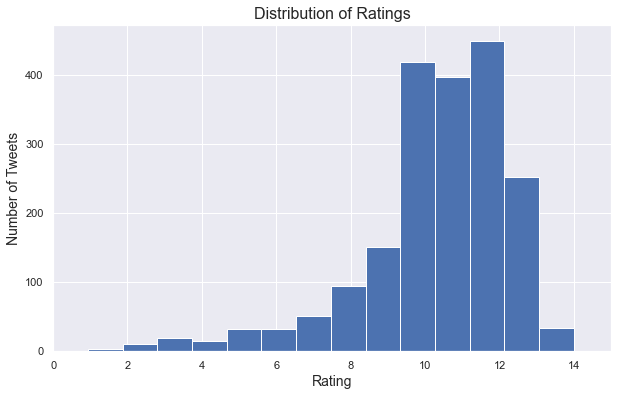

In [271]:
we_rate_dogs['rating_numerator'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

The distribution of ratings is left skewed. From the 1st quartile and 3rd quartile value obtained above, we observed that around 50% of all ratings are between 10 and 12 inclusive

In [272]:
# Percentage of tweets with rating of 10 and up
rating_10up_total = sum(we_rate_dogs.rating_numerator >= 10)
rating_10up_perc = round(rating_10up_total * 100 / we_rate_dogs.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10up_total))
print("Percentage of tweets:                {}%".format(round(rating_10up_perc, 3)))

Number of tweets with rating 10+:  1554
Percentage of tweets:                79%


In [275]:
print("\n Mean no. of favorites per tweet: ", we_rate_dogs.favorite_count.sum()/we_rate_dogs.favorite_count.count())
print("\n Mean no. of retweets per tweet: ", we_rate_dogs.retweet_count.sum()/we_rate_dogs.favorite_count.count())


 Mean no. of favorites per tweet:  8951.505852417304

 Mean no. of retweets per tweet:  2783.665648854962


We observe that the average number of favorites per tweet is more than 3X the average no. of retweets per tweet. Let us check what is the distribution of tweets with various relative proportions of favorites and retweets.

In [276]:
# How many tweets have favorite count <= retweet count?
print("No. of tweets with lower favorite count than retweet count: ",sum(we_rate_dogs.favorite_count <= we_rate_dogs.retweet_count))

# How many tweets have favorite count > retweet count?
print("No. of tweets with higher favorite count than retweet count: ",sum(we_rate_dogs.favorite_count > we_rate_dogs.retweet_count))

No. of tweets with lower favorite count than retweet count:  0
No. of tweets with higher favorite count than retweet count:  1965


Analysis to chek if average no. of retweets differs depending on whether the tweet is posted on a weekday or a weekend

In [280]:
we_rate_dogs_time = we_rate_dogs.copy()
#extracting day of week from timestamp
we_rate_dogs_time['day_of_week'] = we_rate_dogs_time['timestamp'].dt.dayofweek

# Subsetting.
we_rate_dogs_time = we_rate_dogs_time[['day_of_week','rating_numerator', 'retweet_count', 'favorite_count']]

# Calculating the mean of ratings.
we_rate_dogs_mean = we_rate_dogs_time.groupby(['day_of_week']).mean()

we_rate_dogs_mean

,rating_numerator,retweet_count,favorite_count
day_of_week,,,
0,10.367284,2640.873457,8508.052469
1,10.600000,2740.020690,9168.551724
2,10.453925,3121.399317,10067.358362
3,10.670251,2524.913978,8339.487455
4,10.690647,2811.345324,8767.676259
5,10.552419,2995.145161,9064.612903
6,10.454545,2673.055336,8744.383399


It does not seem like no. of retweets or no. of favorites varies significantly with the day of week on which the tweet is posted. However, we notice a rise in both counts on Wednesday (day_of_week = 2)

In [294]:
#classifying day of week as weekday or weekend
we_rate_dogs['day_of_week'] = we_rate_dogs['timestamp'].dt.dayofweek
we_rate_dogs['weekday/weekend'] = np.where(we_rate_dogs['day_of_week'] >= 5, "weekend", "weekday")

print("Mean no. of retweets per tweet when posted on weekends: ", we_rate_dogs.loc[we_rate_dogs['weekday/weekend'] == 'weekend', 'retweet_count'].mean())
print("Mean no. of retweets per tweet when posted on weekdays: ", we_rate_dogs.loc[we_rate_dogs['weekday/weekend'] == 'weekday', 'retweet_count'].mean())

print("Mean no. of favorites per tweet when posted on weekends: ", we_rate_dogs.loc[we_rate_dogs['weekday/weekend'] == 'weekend', 'favorite_count'].mean())
print("Mean no. of favorites per tweet when posted on weekdays: ", we_rate_dogs.loc[we_rate_dogs['weekday/weekend'] == 'weekday', 'favorite_count'].mean())

Mean no. of retweets per tweet when posted on weekends:  2832.493013972056
Mean no. of retweets per tweet when posted on weekdays:  2766.9562841530055
Mean no. of favorites per tweet when posted on weekends:  8902.9001996008
Mean no. of favorites per tweet when posted on weekdays:  8968.139344262296


Thus we observe that whether a tweet is posted on a weekday or weekend does not impact the number of retweets or number of favorites received by the tweet.

In [300]:
# Copying the data frame to a pontual study.
we_rate_dogs_month = we_rate_dogs.copy()

# Subsetting
we_rate_dogs_month = we_rate_dogs_month[['timestamp','rating_numerator']]

# Converting full date to month.
we_rate_dogs_month.timestamp = list(map(lambda x : x.month, we_rate_dogs_month.timestamp))

# Calculating the mean of ratings.
we_rate_dogs_mean = we_rate_dogs_month.groupby(['timestamp']).mean()

# Adding a columns with value counts.
we_rate_dogs_mean = we_rate_dogs_mean.join(pd.DataFrame(we_rate_dogs_month.timestamp.value_counts()))

# Renaming the index.
we_rate_dogs_mean.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Editing the variable name.
we_rate_dogs_mean.columns = ['Avg Rating','Tweets Number']

# Printing the summary.
we_rate_dogs_mean

,Avg Rating,Tweets Number
Jan,10.711207,232
Feb,10.889535,172
Mar,10.939394,165
Apr,11.170213,94
May,11.683673,98
Jun,11.073171,123
Jul,11.470588,136
Aug,11.000000,61
Sep,11.193548,62
Oct,11.703125,64


At first glance, it seems like the average rating seems to be move higher up when the no. of tweets in a month is low. Lets try to analyze the trend visually through a bar and line chart combination

#### What are the 10 most common breeds of dogs tweeted about? 
(Excluding the category 'none'.)

In [354]:
str = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(we_rate_dogs.breed == 'none')
none_perc = none_count * 100 / we_rate_dogs.shape[0]
print(str.format(none_count, round(none_perc)))

str = "Number of distinct breeds:  {}"
print(str.format(len(we_rate_dogs.breed.unique())))

Number of tweets with 'none' predicted breed:  303 (15%)
Number of distinct breeds:  113


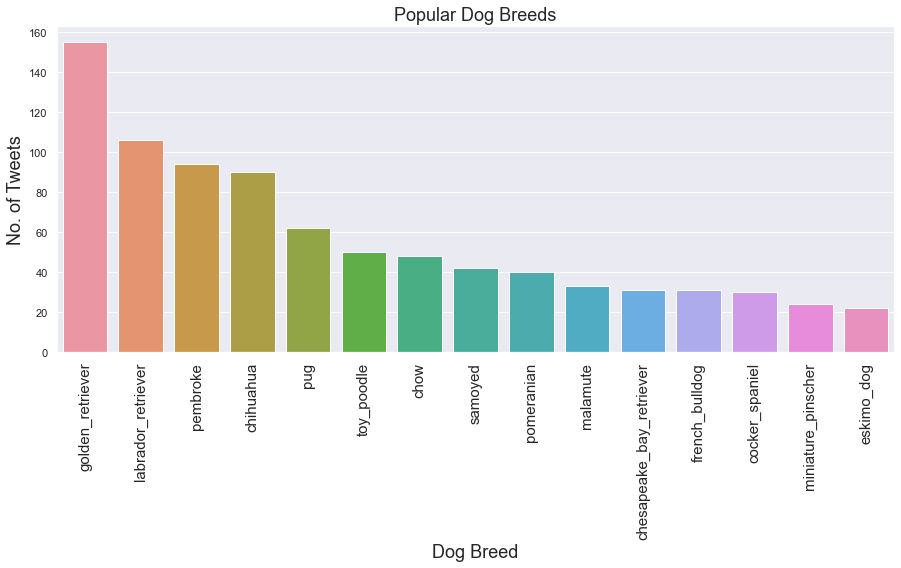

In [355]:
import seaborn as sb
we_rate_dogs_breed = we_rate_dogs[we_rate_dogs['breed'] != 'none']
plt.figure(figsize = (15,6))
ax = sb.barplot(x = we_rate_dogs_breed['breed'].value_counts()[0:15].index,
            y =we_rate_dogs_breed['breed'].value_counts()[0:15],
            data = we_rate_dogs_breed);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breed",fontsize = 18);
plt.ylabel("No. of Tweets",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18);

The above chart shows that the Golden Retriever is the most often tweeted about dog, with more than 150 tweets. Labrador Retrievers, Pembrokes and Chihuahuas are closely spaced together in 2nd, 3rd, and 4th place.

#### Relationship between favourite and retweet counts with dog ratings represented by color code\
We want to check if there is a relationship between favorite_count and retweet_count fields. We will use a simple scatter plot for this.

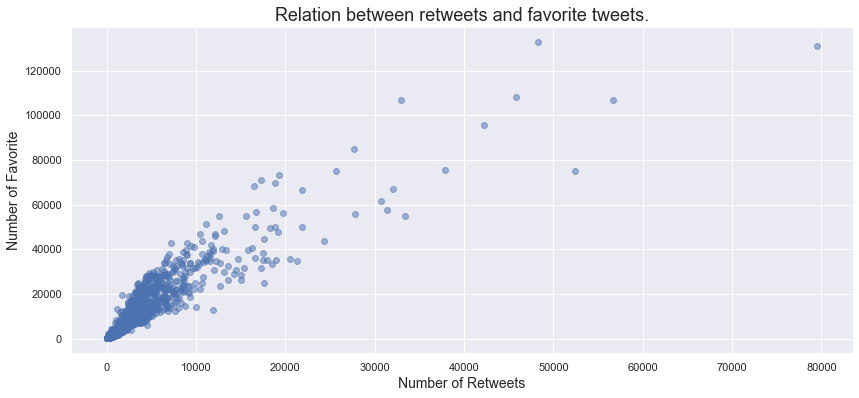

In [363]:
plt.figure(figsize= [14,6])                               # Graphic size
plt.scatter(x = we_rate_dogs['retweet_count'],                  # X varibale
            y = we_rate_dogs['favorite_count'],                 # Y variable
            alpha = 0.5)                         # Transparency
plt.xlabel('Number of Retweets', fontsize = 14)         # X label
plt.ylabel('Number of Favorite', fontsize = 14)         # Y label
plt.title('Relation between retweets and favorite tweets.',
          fontsize = 18)     # Graphic Title
colours = we_rate_dogs['rating_numerator']

plt.show()                     

The above chary shows a strong positive (almost linear) correlation between retweet counts and favorite counts

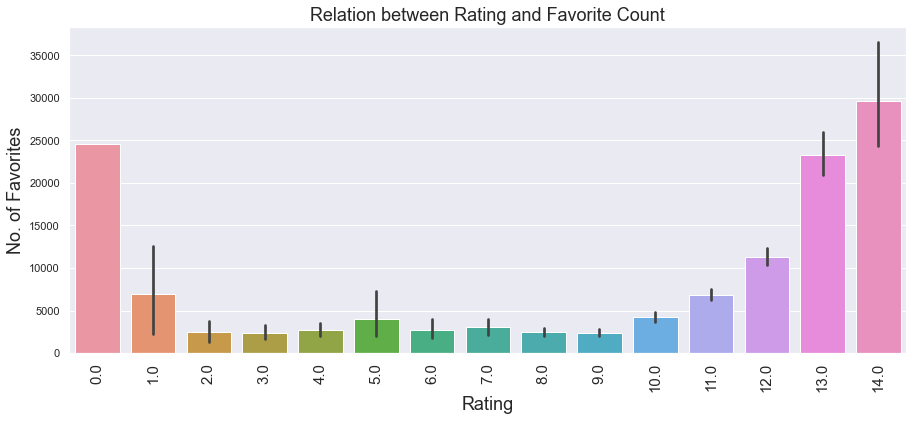

In [368]:
plt.figure(figsize = (15,6))
ax = sb.barplot(x = we_rate_dogs['rating_numerator'],
            y = we_rate_dogs['favorite_count'],
            data = we_rate_dogs);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Rating",fontsize = 18);
plt.ylabel("No. of Favorites",fontsize = 18);
plt.title("Relation between Rating and Favorite Count",fontsize = 18);

The above chart indicates that tweets that receive a higher rating tend to be favorited more number of times by users

### Insights:
1. All tweets analysed have a higher favorite count than retweet count. The average number of favorites per tweet is more than 3X the average no. of retweets per tweet.
2. No. of retweets or no. of favorites does not vary significantly with the day of week on which the tweet is posted. However, we notice a significnatly higher retweet_count and favorite_count for tweets posted on Wednesday.
3. On a similar note, we also observed that whether a tweet is posted on a weekday or weekend does not impact the number of retweets or number of favorites received by the tweet
2. Golden Retriever is the most often tweeted about dog, with more than 150 tweets. Labrador Retrievers, Pembrokes and Chihuahuas are closely spaced together in 2nd, 3rd, and 4th place.
4. We observe a strong positive correlation between retweet counts and favorite counts.
5. We also notice that tweets with higher ratings tend to be favorited and favorited higher number of times by the users